In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('./tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [5]:
dataoveriew(data, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 418

Number of features: 12

Features:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values: 414

Unique values:
PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\asima\AppData\Local\Temp\ipykernel_7036\2489364411.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'],color='g')
C:\Users\asima\AppData\Local\Temp\ipykernel_7036\2489364411.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],color='g')


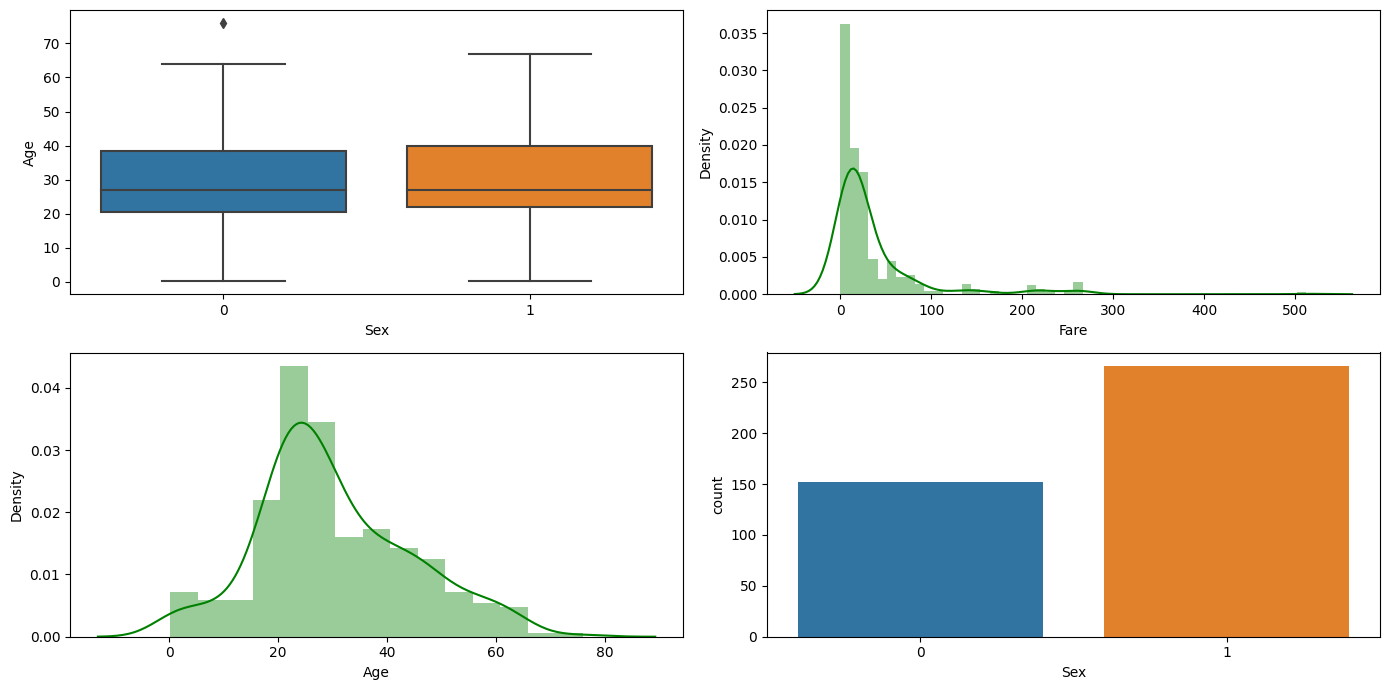

In [41]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= data)

plt.subplot(2,2,2)
sns.distplot(data['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(data['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=data)

plt.tight_layout()
plt.show()

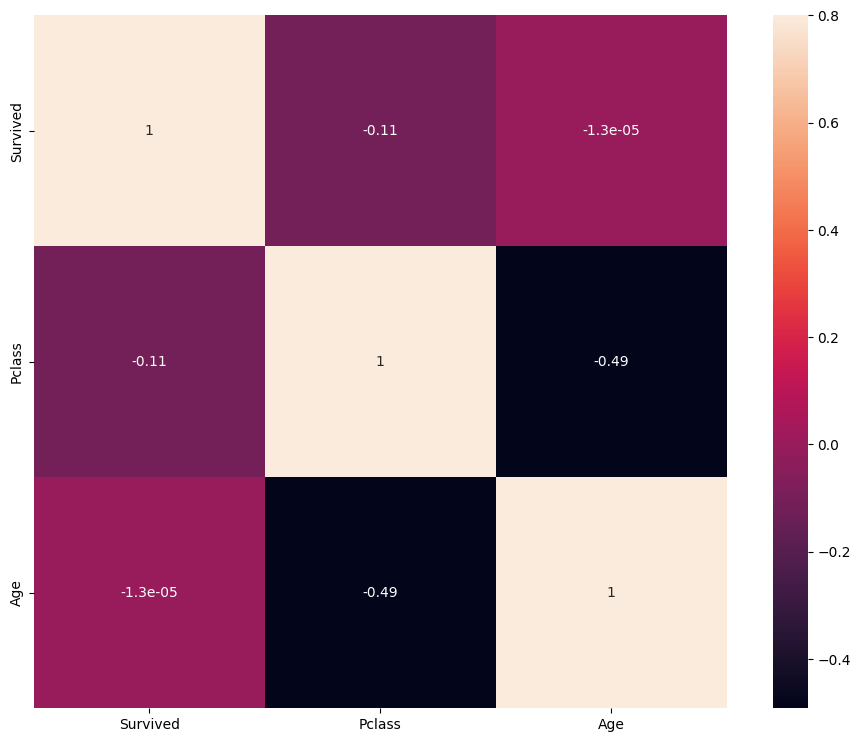

In [20]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
corrmat = numeric_data.corr()

# Create a heatmap
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
data.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [13]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [14]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

C:\Users\asima\AppData\Local\Temp\ipykernel_12584\1715612396.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='g')
C:\Users\asima\AppData\Local\Temp\ipykernel_12584\1715612396.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='g')


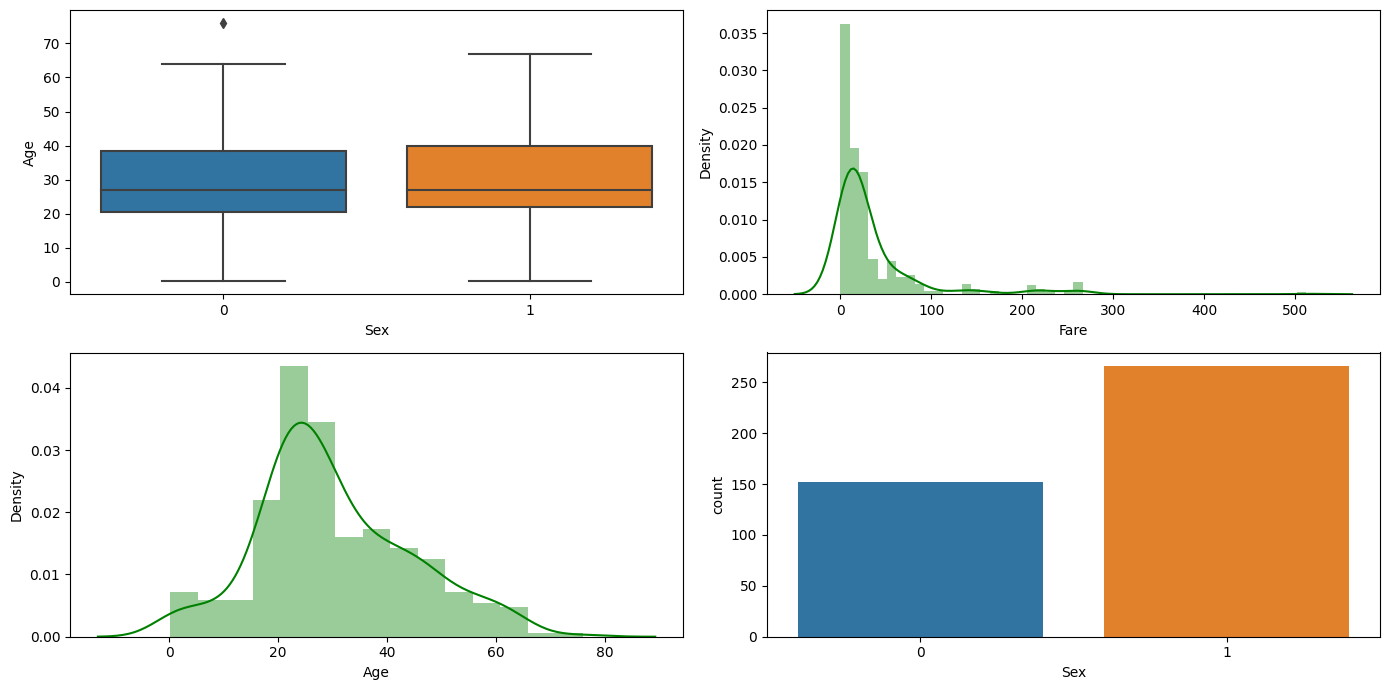

In [45]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()

In [15]:
numerical_features = data.select_dtypes(include = ['float64','int64']).columns.to_list()
categorical_features = data.select_dtypes(exclude = ['float64','int64']).columns.to_list()
print(numerical_features)
print(categorical_features)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Ticket']


<Figure size 1000x1000 with 0 Axes>

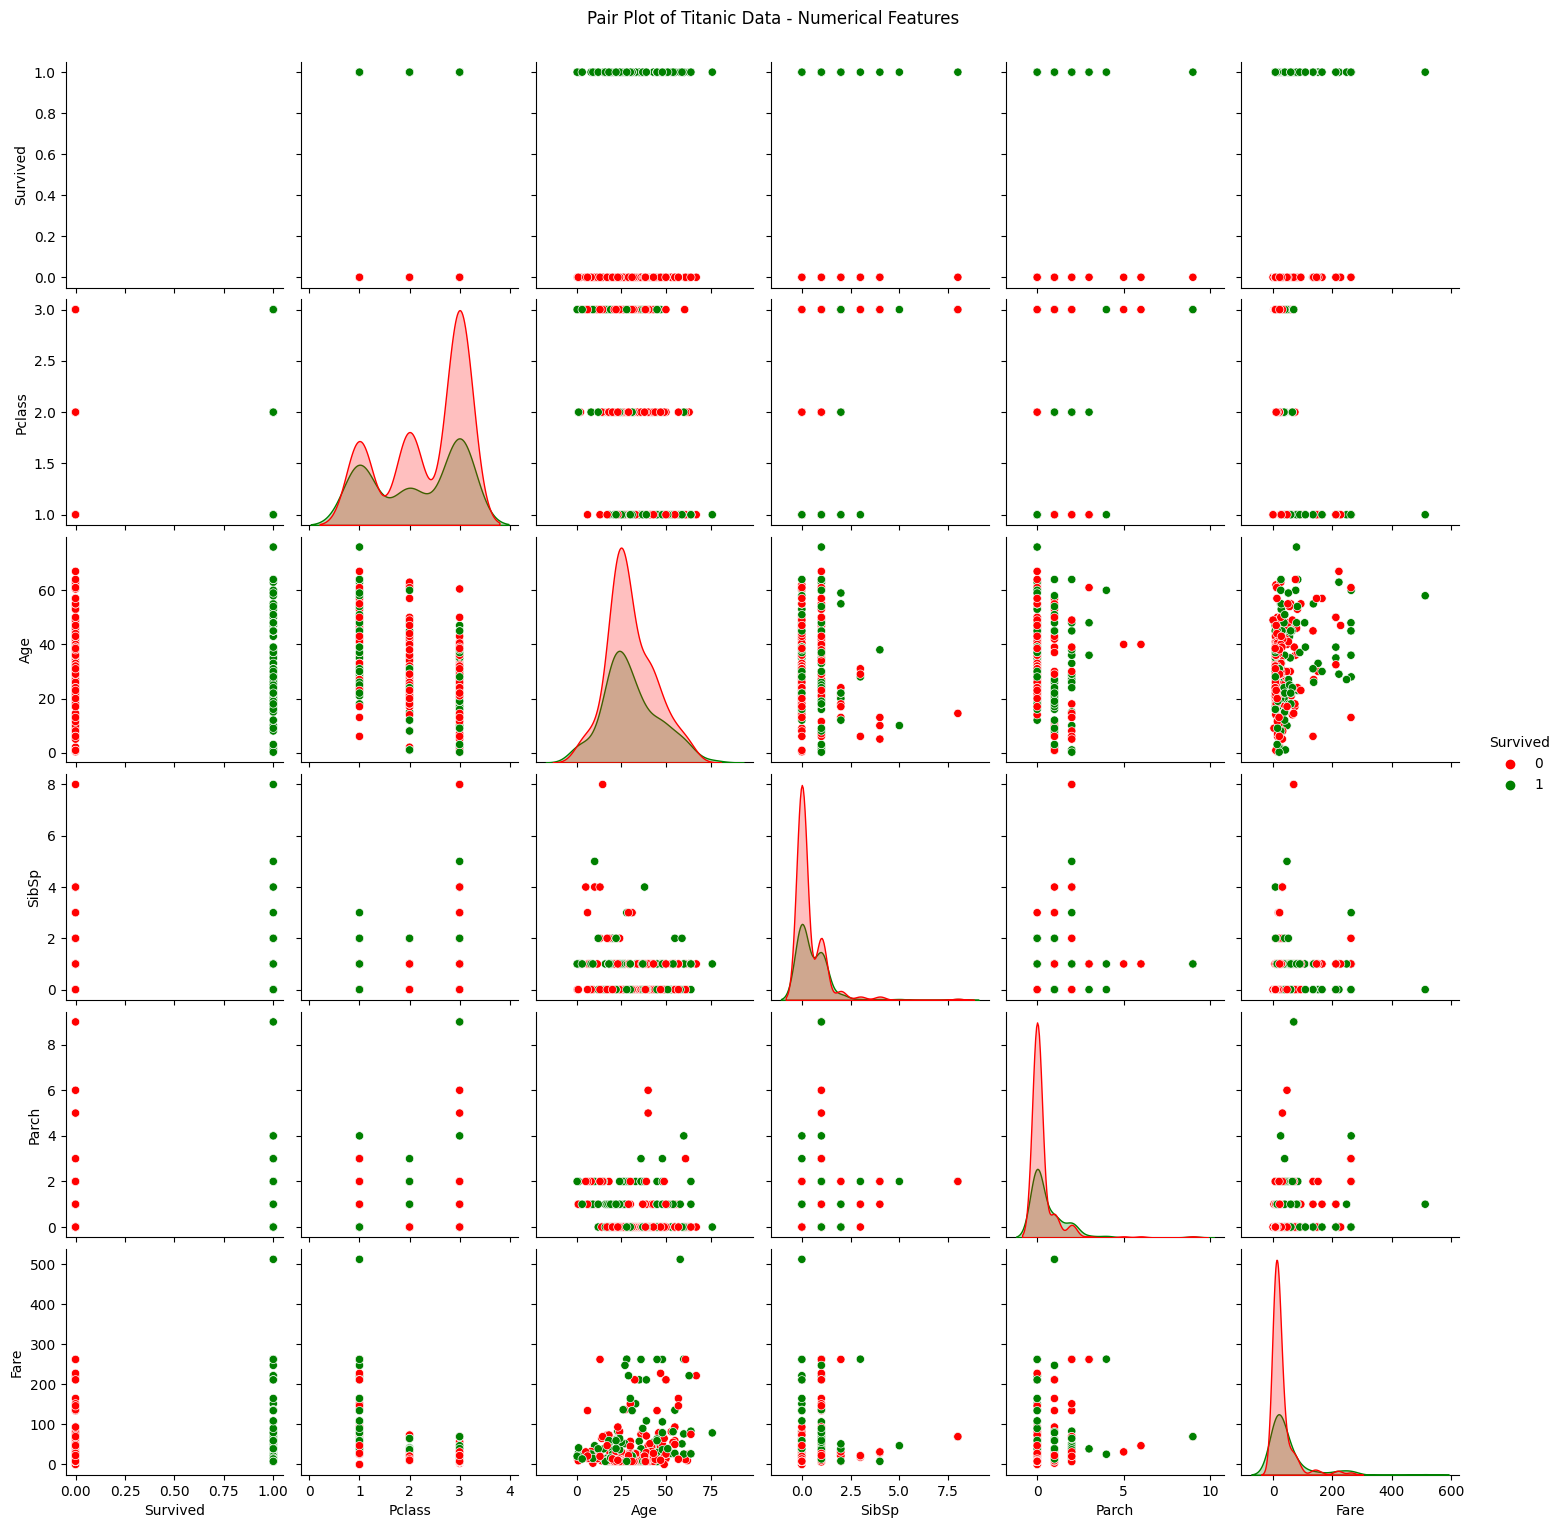

In [16]:
# Pairplotting of Numerical Data to fetch more insight

plt.figure(figsize=(10, 10))  
sns.pairplot(data=data, vars=numerical_features, kind='scatter', hue='Survived',palette=['red','green'])
plt.suptitle("Pair Plot of Titanic Data - Numerical Features", y=1.02)
plt.show()

In [17]:
data[data['Age']>=60]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
2,0,2,male,62.0,0,0,240276,9.6875
13,0,2,male,63.0,1,0,24065,26.0000
48,1,1,female,60.0,0,0,11813,76.2917
69,1,1,female,60.0,1,4,19950,263.0000
81,0,1,male,67.0,1,0,PC 17483,221.7792
96,1,1,female,76.0,1,0,19877,78.8500
114,1,1,female,63.0,1,0,PC 17483,221.7792
142,0,1,male,61.0,1,3,PC 17608,262.3750
152,0,3,male,60.5,0,0,3701,NaN
179,1,1,female,64.0,0,2,PC 17756,83.1583


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [20]:
label_encoder = LabelEncoder()
# Apply Label Encoding to 'Sex' column
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,34.5,0,0,330911,7.8292
1,1,3,0,47.0,1,0,363272,7.0000
2,0,2,1,62.0,0,0,240276,9.6875
3,0,3,1,27.0,0,0,315154,8.6625
4,1,3,0,22.0,1,1,3101298,12.2875


In [21]:
data['Ticket'] = data['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [32]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,1,34.5,0,0,330911,7.8292
1,3,0,47.0,1,0,363272,7.0000
2,2,1,62.0,0,0,240276,9.6875
3,3,1,27.0,0,0,315154,8.6625
4,3,0,22.0,1,1,3101298,12.2875


In [23]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [33]:
x.Age[0:10]
x.Age = x.Age.fillna(x.Age.mean())
x.Age[0:10]
train_test_split(x,y,train_size = 0.8)

[     Pclass  Sex       Age  SibSp  Parch  Ticket      Fare
 89        2    1   2.00000      1      1   29103   23.0000
 247       2    1  42.00000      1      1   28220   32.5000
 408       3    0  30.27259      0      0  334915    7.7208
 257       3    1  28.00000      0      0  363611    8.0500
 381       3    1  26.00000      0      0  330910    7.8792
 ..      ...  ...       ...    ...    ...     ...       ...
 217       1    1  57.00000      1      1   36928  164.8667
 101       2    1  27.00000      1      0  228414   26.0000
 170       3    1  30.27259      0      0     251    7.5500
 299       3    1  29.00000      0      0  347467    7.8542
 64        1    1  13.00000      2      2   17608  262.3750
 
 [334 rows x 7 columns],
      Pclass  Sex       Age  SibSp  Parch   Ticket     Fare
 103       3    1  26.00000      0      0   347070   7.7750
 359       3    0  30.00000      1      0   349910  15.5500
 360       3    1  14.50000      8      2     2343  69.5500
 323       1 

In [34]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [37]:
x_train.dropna(inplace=True)
y_train = y_train[x_train.index]  # Update Y_train to match the same indices

x_test.dropna(inplace=True)
y_test = y_test[x_test.index]  # Update Y_test to match the same indices


In [38]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [40]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Logistic Regression - Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        42
           1       0.00      0.00      0.00        28

    accuracy                           0.60        70
   macro avg       0.30      0.50      0.37        70
weighted avg       0.36      0.60      0.45        70


Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        28

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        28

    accuracy

C:\Users\asima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,